In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import ruptures as rpt


from scipy.stats import lognorm

import os

import yfinance as yf
import requests


# загрузка модели из реализованного модуля
from DL_module import ALACPD

### ALACPD model

In [2]:
# Чтение данных из препроцессинга
returns = pd.read_csv("returns_crypto.csv").iloc[:,1:]
returns['Date'] = pd.to_datetime(returns.Date).dt.date
returns.head()

,BTC-USD,ETH-USD,USDT-USD,BNB-USD,XRP-USD,DOGE-USD,ADA-USD,TRX-USD,LINK-USD,BCH-USD,...,TRAC-USD,SC-USD,ELF-USD,QTUM-USD,BAT-USD,LRC-USD,DASH-USD,DCR-USD,GAS-USD,Date
0,-0.046991,-0.068333,-0.001158,-0.010225,-0.068094,-0.044836,-0.081062,-0.099265,-0.130579,-0.087767,...,-0.116799,-0.109805,-0.121305,-0.057361,-0.108823,-0.126726,-0.039344,-0.092243,-0.070334,2018-06-12
1,-0.035316,-0.038944,0.002758,-0.041842,-0.050219,-0.088054,-0.037080,-0.055682,-0.061714,-0.034527,...,-0.096486,-0.060820,-0.047805,-0.056788,-0.063299,-0.032789,-0.058051,-0.002946,-0.069776,2018-06-13
2,0.051253,0.088479,0.000418,0.020988,0.049831,0.045083,0.074603,0.093516,0.118578,0.063205,...,0.246639,0.170375,0.045171,0.048935,0.125883,0.079084,0.090922,0.148690,0.085001,2018-06-14
3,-0.032773,-0.055293,0.002988,0.010258,-0.042043,-0.014606,-0.055855,-0.056080,-0.068373,-0.053796,...,-0.051877,-0.079005,-0.012008,-0.042384,0.074454,-0.051358,-0.038249,-0.082695,-0.075215,2018-06-15
4,0.014494,0.017593,-0.002691,0.050578,-0.005436,-0.002068,0.001321,0.008048,-0.006866,0.003386,...,0.011107,-0.017341,0.033364,0.007297,0.024911,0.042775,0.031450,-0.008604,0.017073,2018-06-16


In [3]:
from DL_module import ALACPD

In [4]:
# исходный датафрейм
crypto_val = pd.read_csv("crypto_values_close.csv").iloc[:,1:]
close_price = crypto_val['BTC-USD'].values

In [ ]:
w = 6
hidden_dim = 20
ensemble_size = 3
skip_sizes = [3, 5, 7]
horizon = 4
C = 1.4
ninit_ratio = 0.1  # 10% от общего количества образцов
beta = 0.6
nCPD = 3
learning_rate = 0.001
einit = 10
etrain = 5
ereinit = 100

Online Training: 100%|██████████| 1533/1533 [06:52<00:00,  3.72it/s]


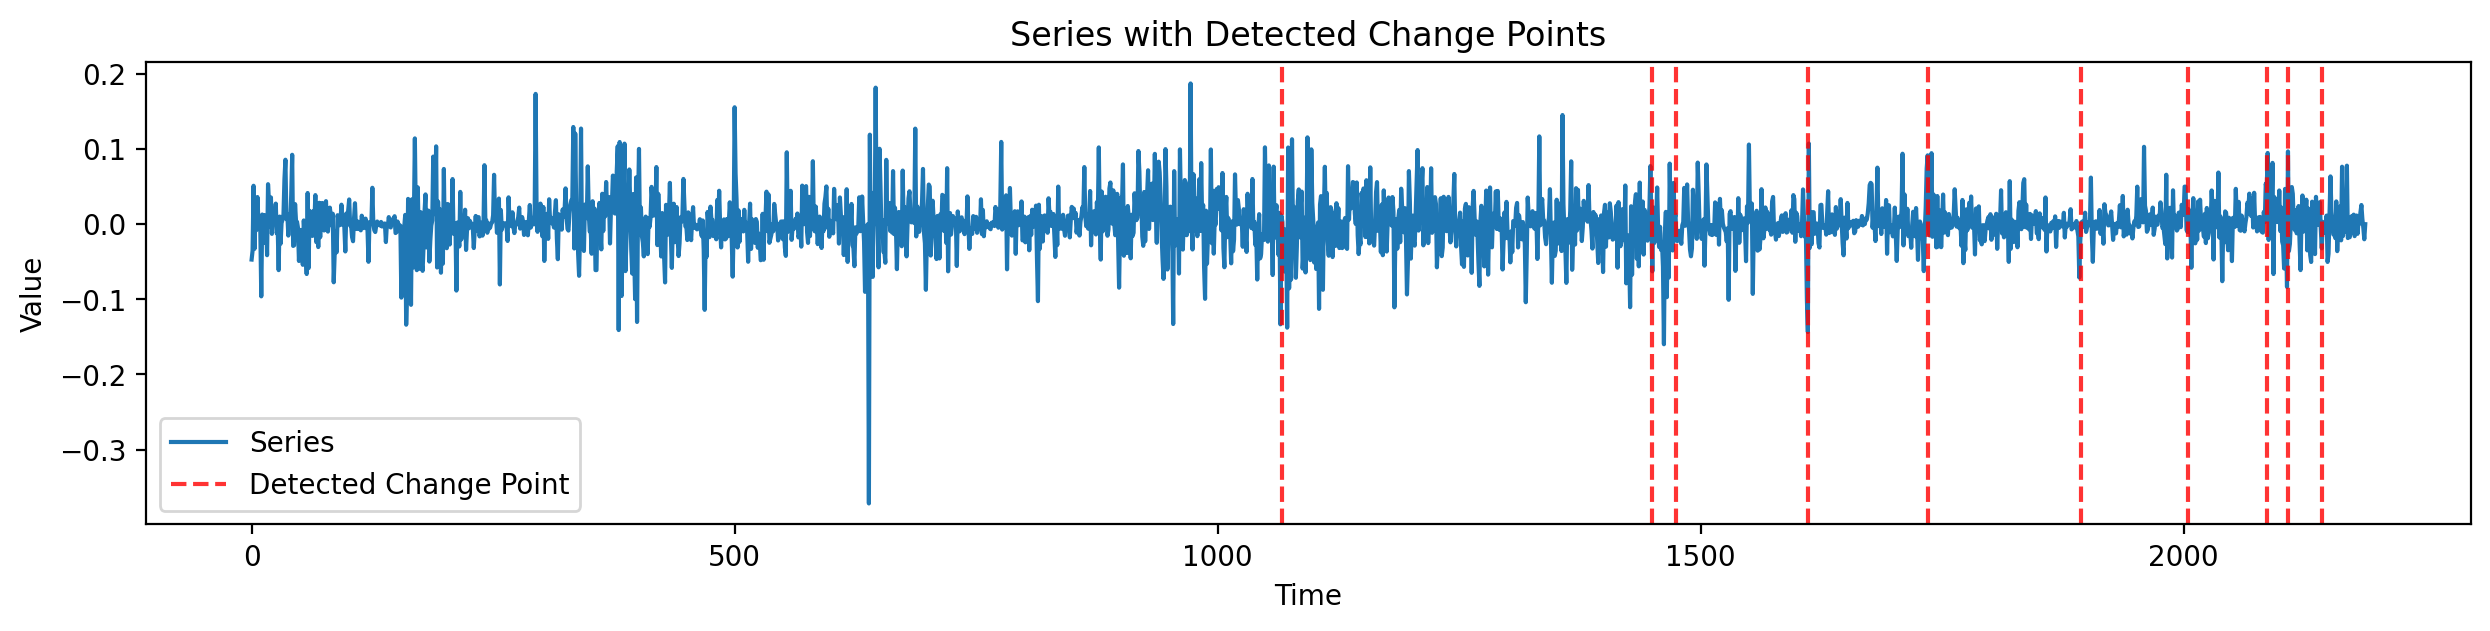

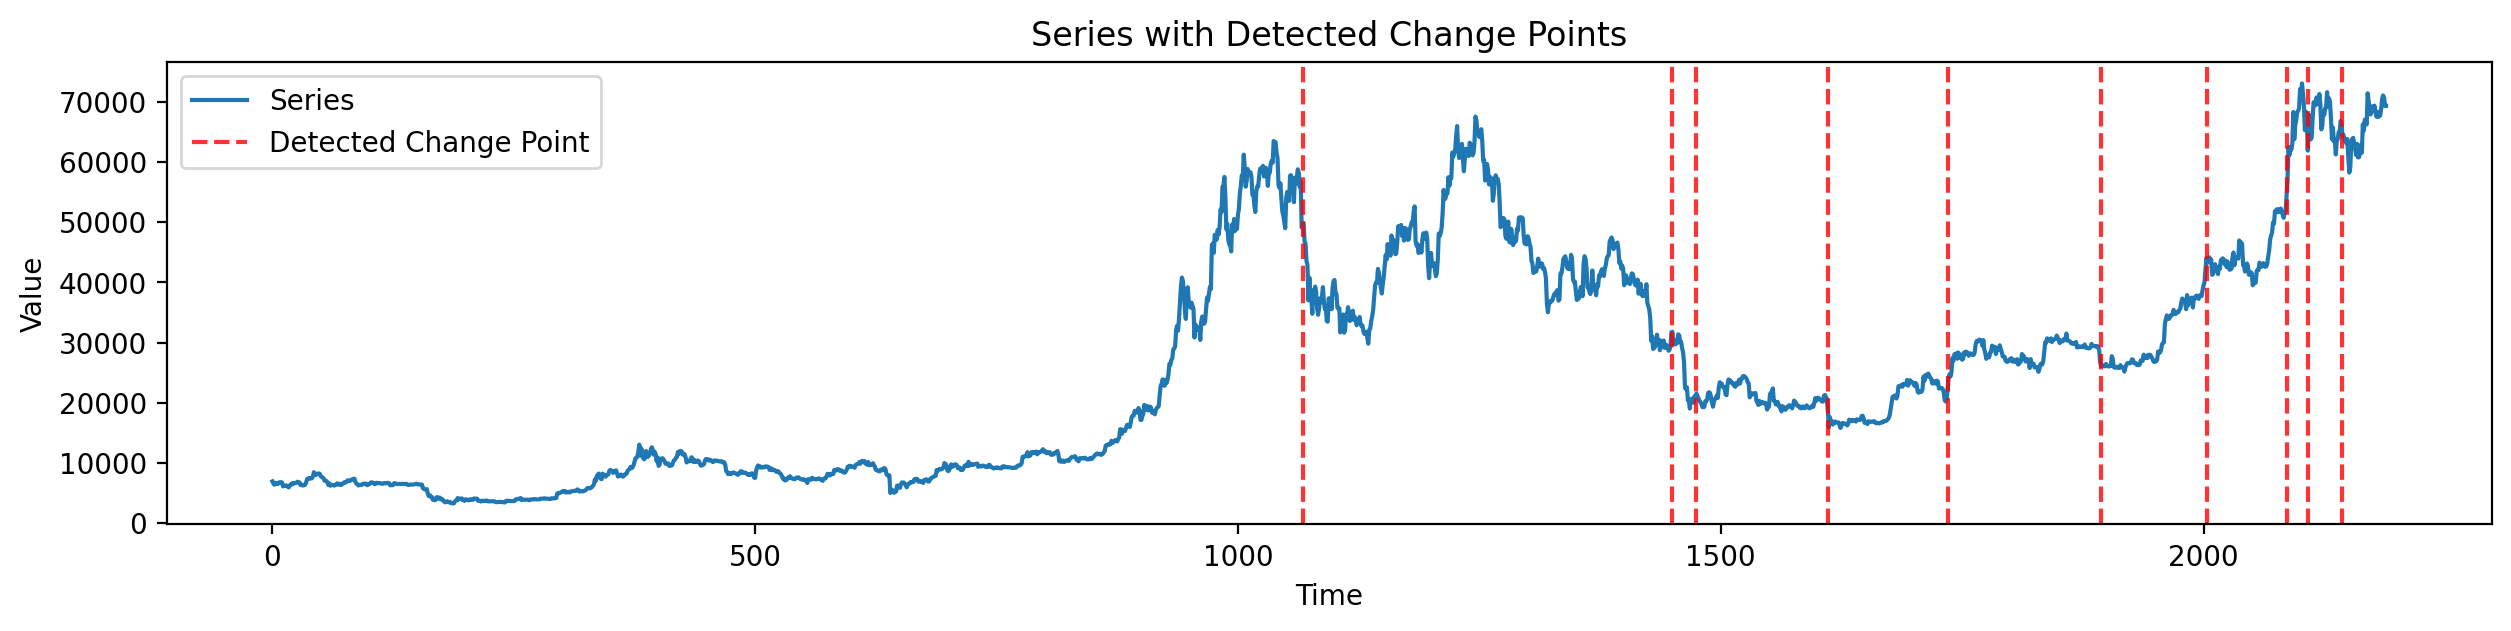

In [6]:
series_length = len(returns)
series = returns['BTC-USD'].values

# Параметры из статьи
w = 6
hidden_dim = 20
ensemble_size = 3
skip_sizes = [3, 5, 7]
horizon = 4
C = 1.4

ninit_ratio = 0.3  # 10% от общего количества образцов
beta = 0.6
nCPD = 2
learning_rate = 0.001
einit = 10
etrain = 5
ereinit = 100

# Подготовка данных
series_standardized = (series - np.mean(series)) / np.std(series)

# Инициализация и обучение модели
input_dim = 1
output_dim = 1
ninit = int(len(series) * ninit_ratio)

alacpd = ALACPD(input_dim, hidden_dim, output_dim, skip_sizes, ensemble_size, learning_rate, w, horizon, beta, nCPD)

change_points_detected = alacpd.train_online(series, ninit, einit, etrain, ereinit, threshold=C)
alacpd.plot_series_with_change_points(series, change_points_detected)

alacpd.plot_series_with_change_points(close_price, change_points_detected)


Online Training: 100%|██████████| 1533/1533 [02:24<00:00, 10.59it/s]


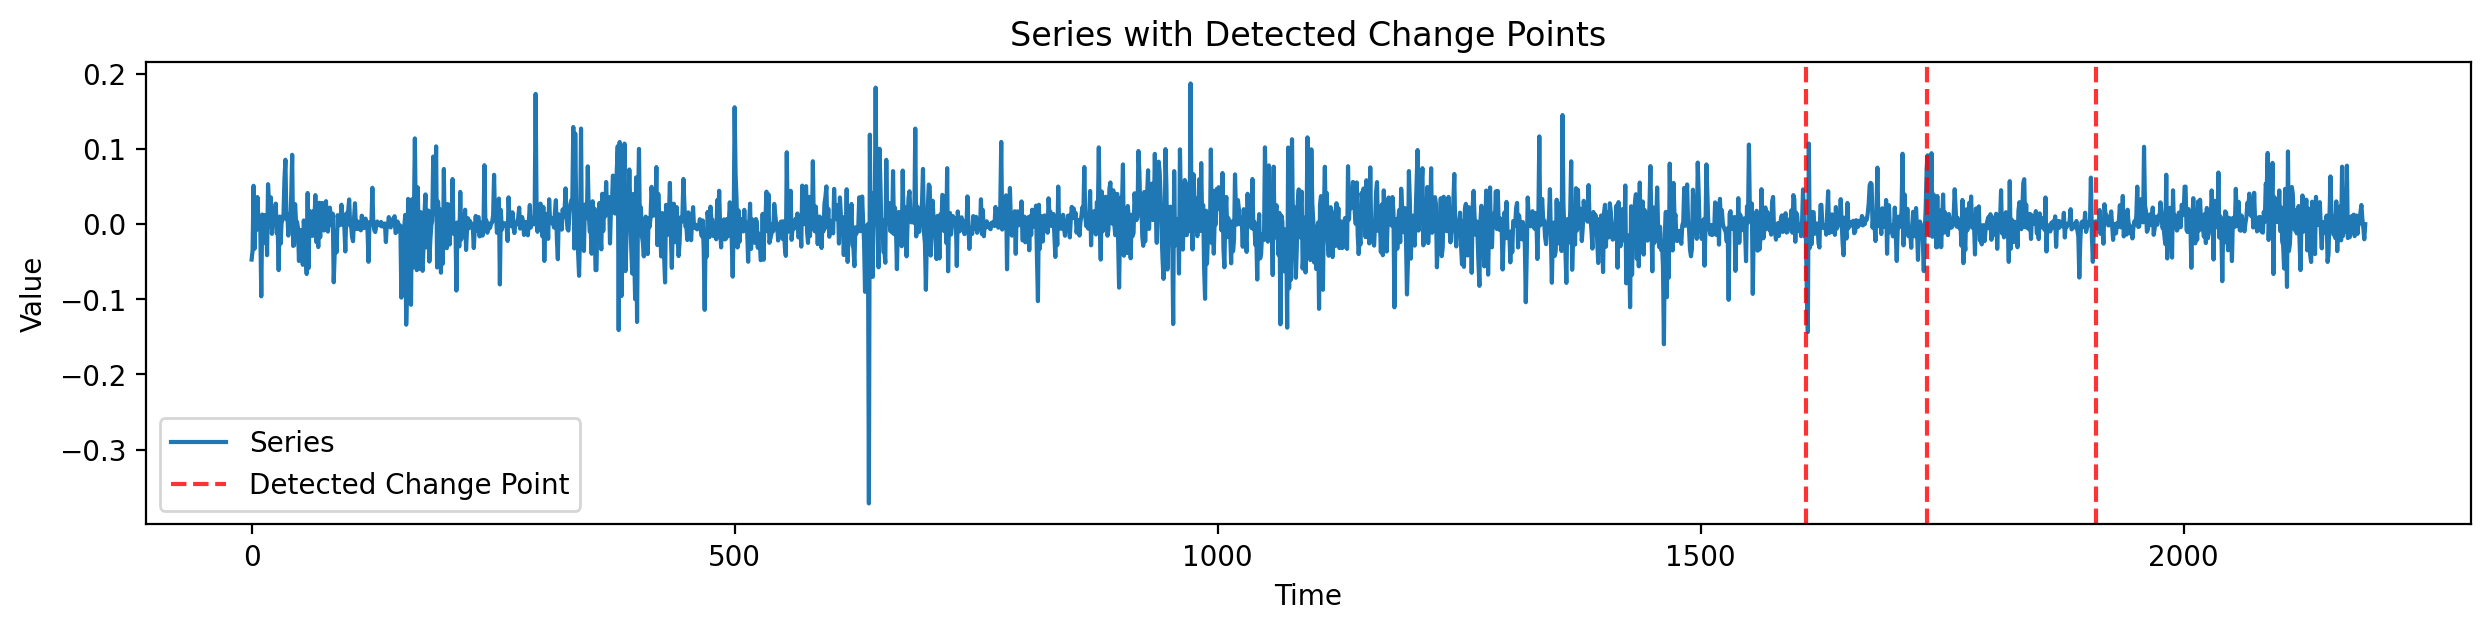

<bound method ALACPD.plot_series_with_change_points of <__main__.ALACPD object at 0x30bb75f90>>

In [10]:
series_length = len(returns)
series = returns['BTC-USD'].values

# Параметры из статьи
w = 6
hidden_dim = 20
ensemble_size = 3
skip_sizes = [3, 5, 7]
horizon = 4
C = 1.4

ninit_ratio = 0.3  # 10% от общего количества образцов
beta = 0.6
nCPD = 3
learning_rate = 0.001
einit = 10
etrain = 5
ereinit = 100

# Подготовка данных
series_standardized = (series - np.mean(series)) / np.std(series)

# Инициализация и обучение модели
input_dim = 1
output_dim = 1
ninit = int(len(series) * ninit_ratio)

alacpd = ALACPD(input_dim, hidden_dim, output_dim, skip_sizes, ensemble_size, learning_rate, w, horizon, beta, nCPD)

change_points_detected = alacpd.train_online(series, ninit, einit, etrain, ereinit, threshold=C)
alacpd.plot_series_with_change_points(series, change_points_detected)
alacpd.plot_series_with_change_points(close_price, change_points_detected)


#### Подбор параметров с новой реализацией модели

In [7]:
btc = pd.read_csv("btc_usd_ret.csv").iloc[:,1:]
change_points_true = pd.read_csv("btc_usd_cp.csv").iloc[:,1:]
btc[['date','value']]
change_points_true[['date','value']]

,date,value
0,2018-06-11,0.0
1,2018-06-12,0.0
2,2018-06-13,0.0
3,2018-06-14,0.0
4,2018-06-15,0.0
...,...,...
2185,2024-06-04,0.0
2186,2024-06-05,0.0
2187,2024-06-06,0.0
2188,2024-06-07,0.0


Online Training: 100%|██████████| 1971/1971 [02:48<00:00, 11.72it/s] 
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


500


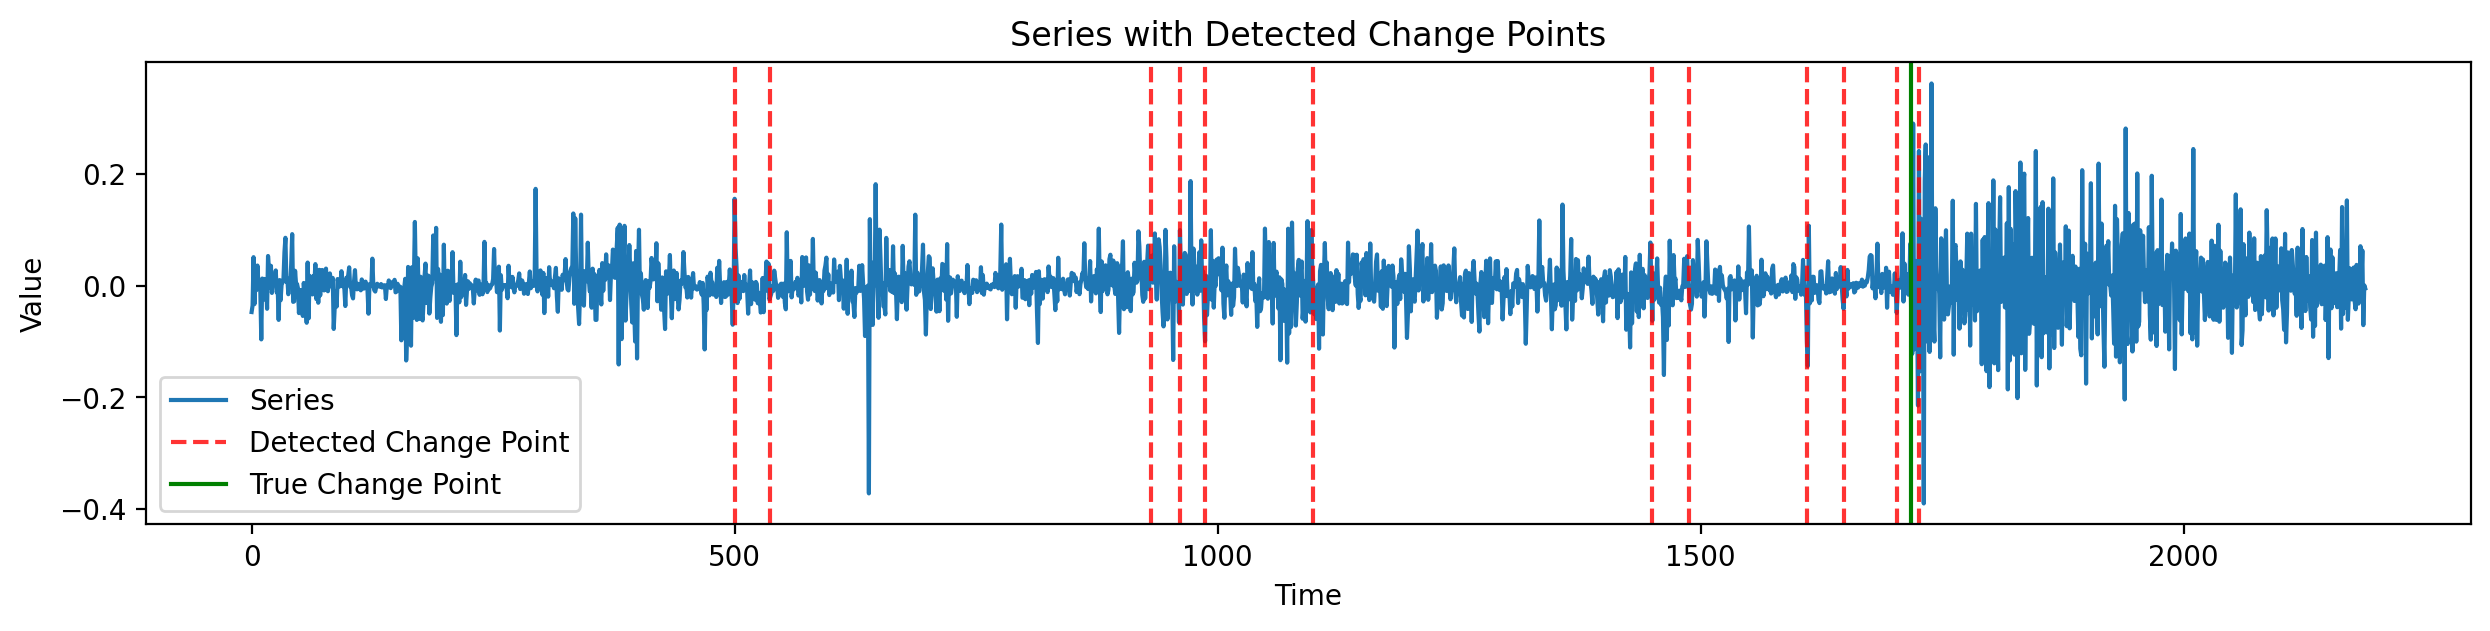

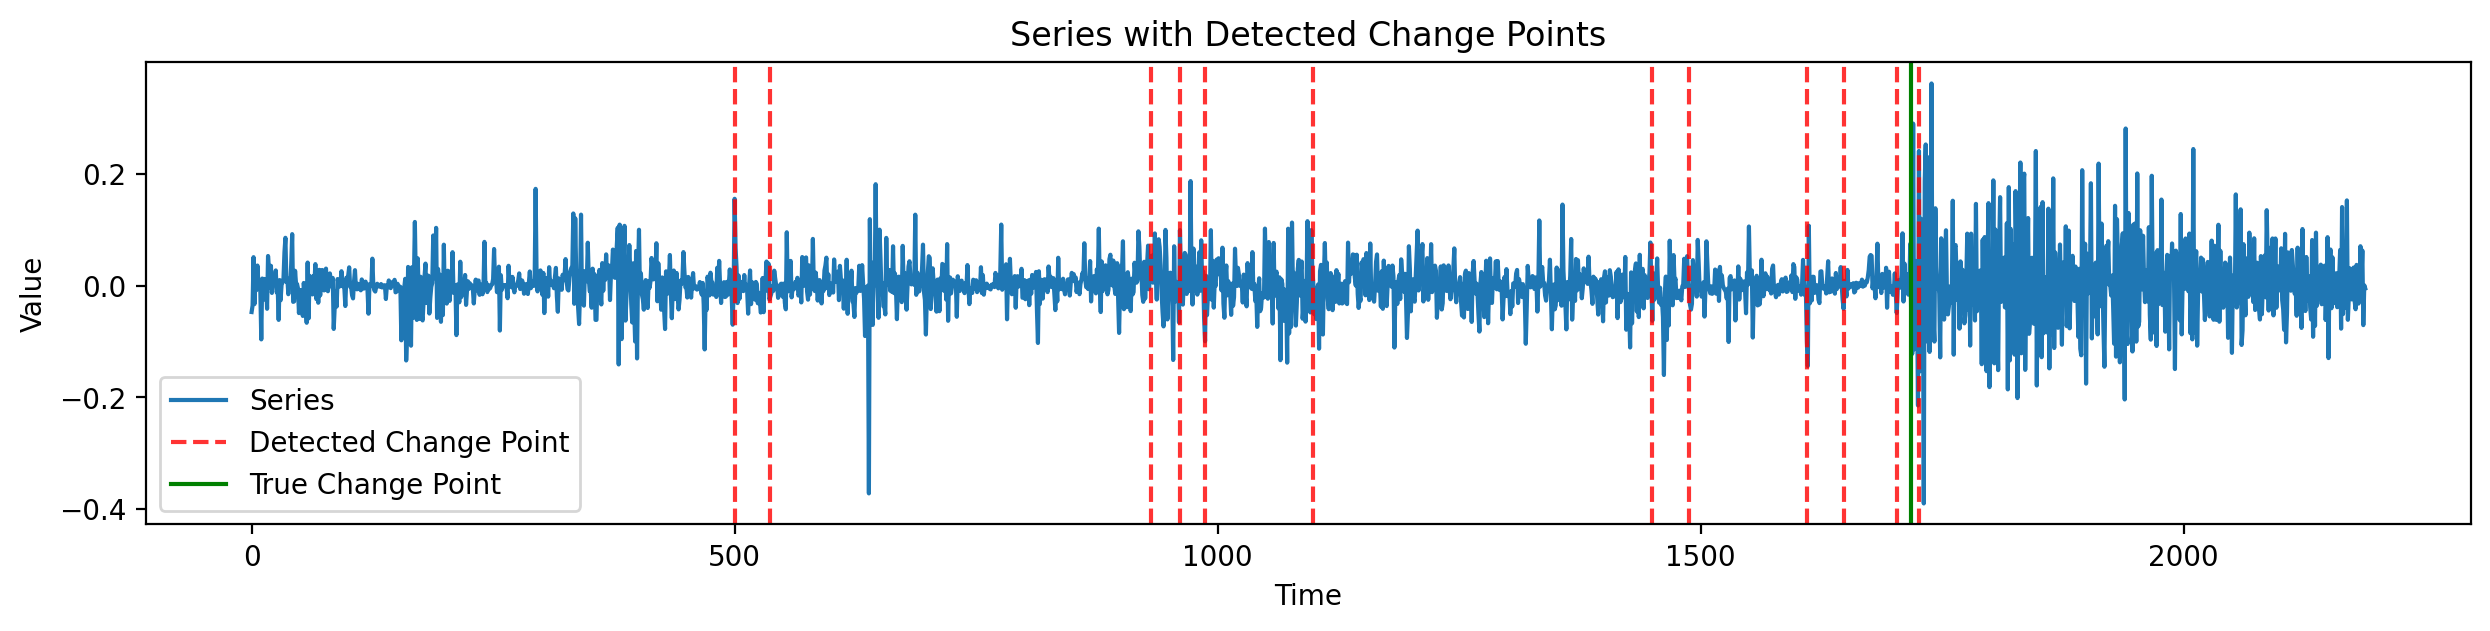

In [9]:
btc = pd.read_csv("btc_usd_ret.csv").iloc[:,1:]

change_points_true = pd.read_csv("btc_usd_cp.csv").iloc[:,1:]
series_length = len(btc)
change_points_true = list(change_points_true[change_points_true.value == 1].index)
series = btc.value.values



w = 6
hidden_dim = 20
ensemble_size = 3
skip_sizes = [3, 5, 7]
horizon = 4
C = 1.4

ninit_ratio = 0.3  # 10% от общего количества образцов
beta = 0.6
nCPD = 2
learning_rate = 0.001
einit = 10
etrain = 5
ereinit = 100

# anomaly_window = 21
# vol_window = 30

series_standardized = (series - np.mean(series)) / np.std(series)

# Инициализация и обучение модели
input_dim = 1
output_dim = 1
ninit = int(len(series) * ninit_ratio)


alacpd = ALACPD(input_dim, hidden_dim, output_dim, skip_sizes, ensemble_size, learning_rate, w, horizon, beta, nCPD)
change_points_detected = alacpd.train_online(series, int(len(series) * 0.1),einit, \
                                             etrain, ereinit, threshold = C, \
                                             anomaly_window=anomaly_window, \
                                             vol_window=vol_window)


metrics = alacpd.calculate_metrics(change_points_detected, change_points_true)
score = metrics['False Detection Delay (FDD)']

print(score)
alacpd.plot_series_with_change_points(series, change_points_detected,true_change_points = change_points_true)
# alacpd.plot_series_with_change_points(btc.value.values, change_points_detected,true_change_points = change_points_true)


Online Training: 100%|██████████| 1971/1971 [00:45<00:00, 43.52it/s] 

1004



/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


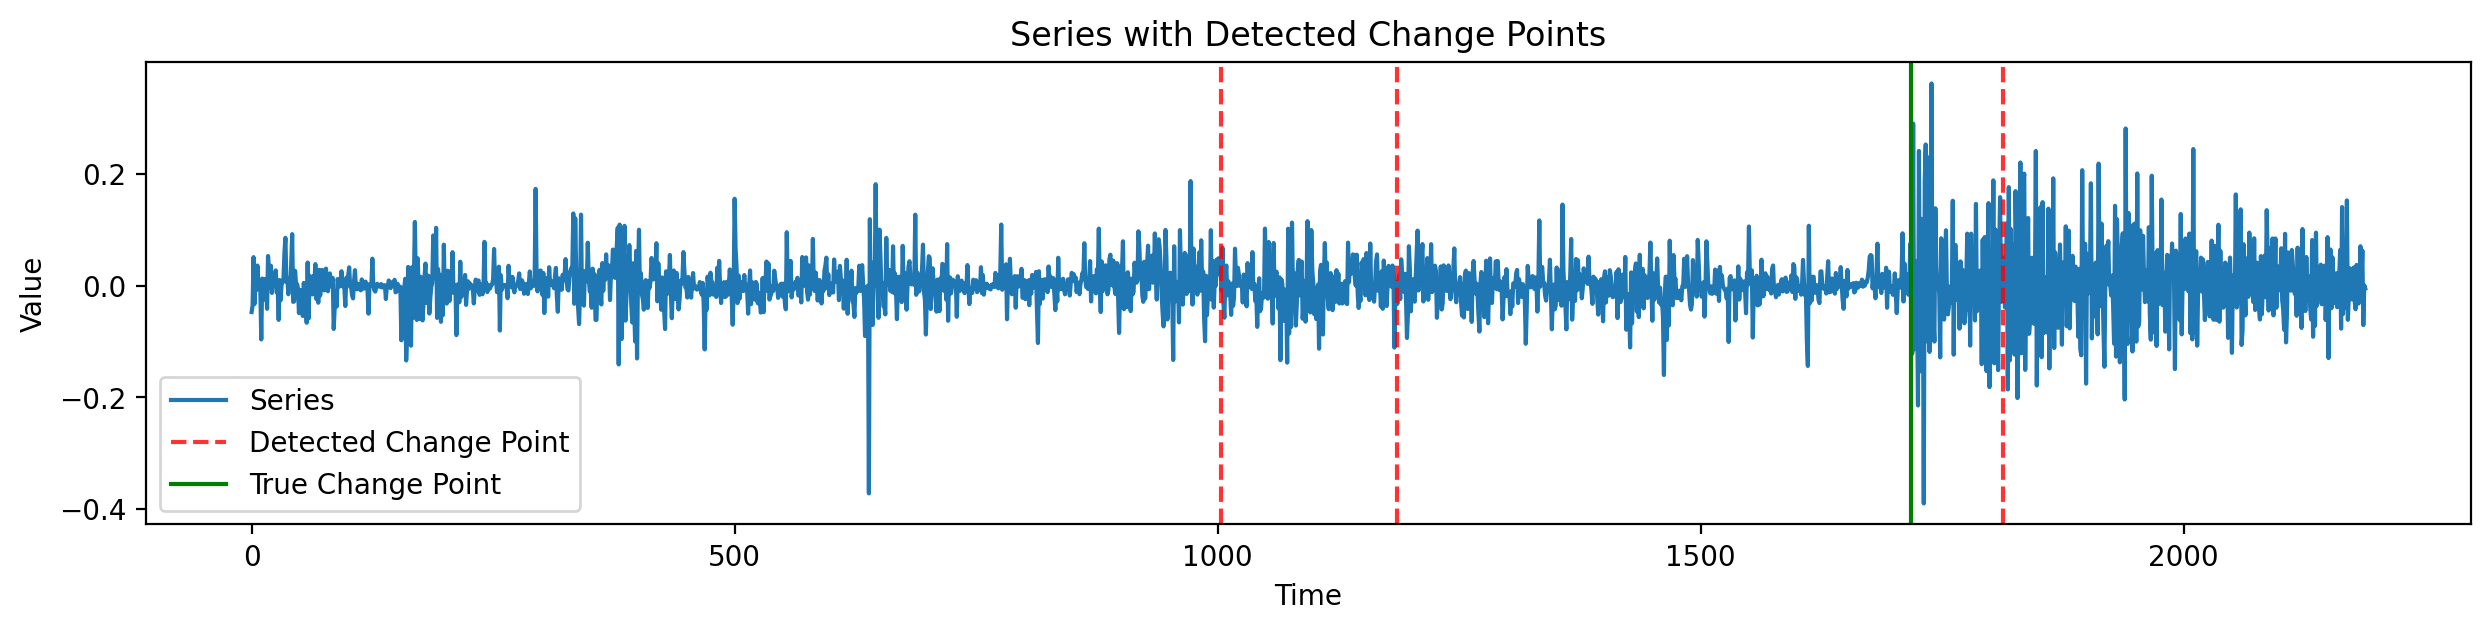

In [14]:
btc = pd.read_csv("btc_usd_ret.csv").iloc[:,1:]
change_points_true = pd.read_csv("btc_usd_cp.csv").iloc[:,1:]
series_length = len(btc)
change_points_true = list(change_points_true[change_points_true.value == 1].index)
series = btc.value.values



w = 7
hidden_dim = 20
ensemble_size = 3
skip_sizes = [3, 5, 7]
horizon = 4
C = 1.4

ninit_ratio = 0.1  # 10% от общего количества образцов
beta = 0.6
nCPD = 3
learning_rate = 0.001
einit = 10
etrain = 5
ereinit = 100

# anomaly_window = 21
# vol_window = 30

series_standardized = (series - np.mean(series)) / np.std(series)

# Инициализация и обучение модели
input_dim = 1
output_dim = 1
ninit = int(len(series) * ninit_ratio)


alacpd = ALACPD(input_dim, hidden_dim, output_dim, skip_sizes, ensemble_size, learning_rate, w, horizon, beta, nCPD)
change_points_detected = alacpd.train_online(series, int(len(series) * 0.1),einit, \
                                             etrain, ereinit, threshold = C, \
                                             anomaly_window=anomaly_window, \
                                             vol_window=vol_window)


metrics = alacpd.calculate_metrics(change_points_detected, change_points_true)
score = metrics['False Detection Delay (FDD)']

print(score)
alacpd.plot_series_with_change_points(series, change_points_detected,true_change_points = change_points_true)
# alacpd.plot_series_with_change_points(btc.value.values, change_points_detected,true_change_points = change_points_true)


In [44]:
results_df

,params,num_detected_points,add,fdd
0,{'C': 0.7},19,0.0,653
1,{'C': 1.4},4,NaN,500
2,{'C': 2.0},18,NaN,383
